# Segmentation

> seg·men·ta·tion
> ˌseɡmənˈtāSH(ə)
>
> noun
>
> division into separate parts or sections.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from myshow import myshow


filename = "/Users/dwelc/Pictures/Photos Library.photoslibrary/Masters/2017/03/30/20170330-023816/14517543_978703668908670_2152534371158190351_n.jpg"

In [2]:
# "Simple" segmentations

# SimpleITK
import SimpleITK as sitk 

# region growing
image = sitk.ReadImage(filename, sitk.sitkVectorUInt8)
seeds1 = [[250, 700], [200, 675]]
seeds2 = [[625, 275], [675, 300], [640, 330]]

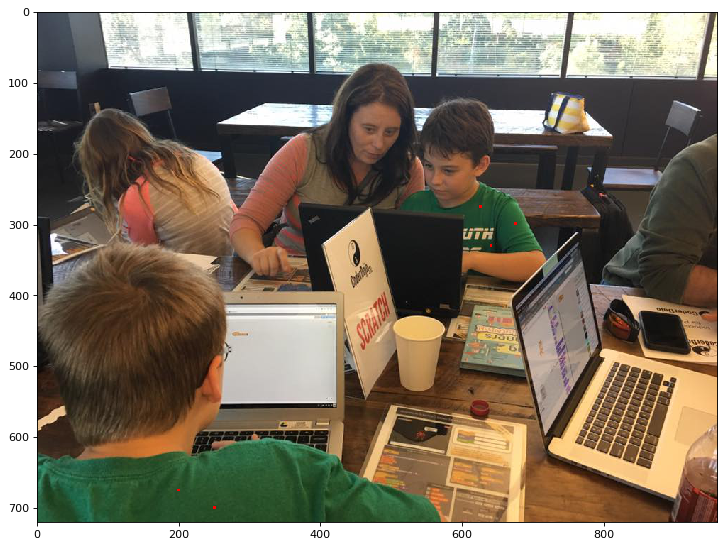

In [3]:
array = sitk.GetArrayFromImage(image)
for seed in seeds1 + seeds2:
    x, y = seed
    for _x in range(x-2, x+2):
        for _y in range(y-2, y+2):
            if (_x, _y) == seed: continue
            array[_y, _x] = [255, 0, 0]
myshow(array)

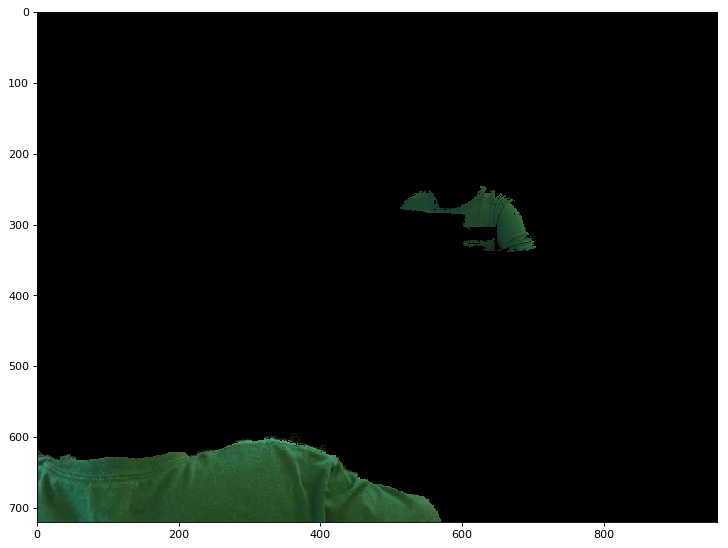

In [4]:
seg1 = sitk.VectorConfidenceConnected(image, seedList=seeds1, 
                                      numberOfIterations=10, multiplier=7,
                                      initialNeighborhoodRadius=8)
seg2 = sitk.VectorConfidenceConnected(image, seedList=seeds2, 
                                      numberOfIterations=15, multiplier=3.5,
                                      initialNeighborhoodRadius=6)
seg = seg1 + seg2
myshow(sitk.Mask(image, seg))

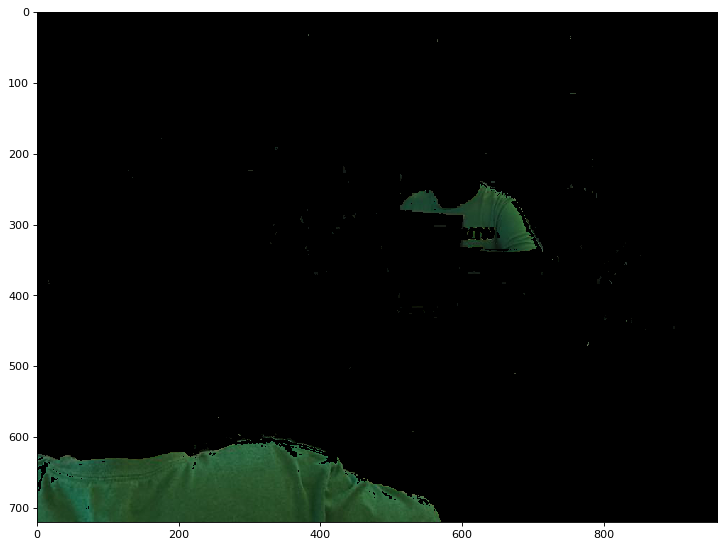

In [5]:
# scikit-image
import skimage.io as skio
import skimage.color as color

# thresholding
array = color.rgb2hsv(skio.imread(filename))  # H from 0. - 1.0
# hue: green ~~ 120
mask = np.zeros(array[:,:,0].shape)
mask += array[:,:,0] >= 80./360.
mask += array[:,:,0] <= 160./360.
# saturation
mask += array[:,:,1] > 50./255.
# value
mask += array[:,:,2] < 120./255.
mask = mask < 4
array[mask] = 0
myshow(color.hsv2rgb(array))

# For more cleaning up, use:
# from skimage.morphology import disk, opening, dilation

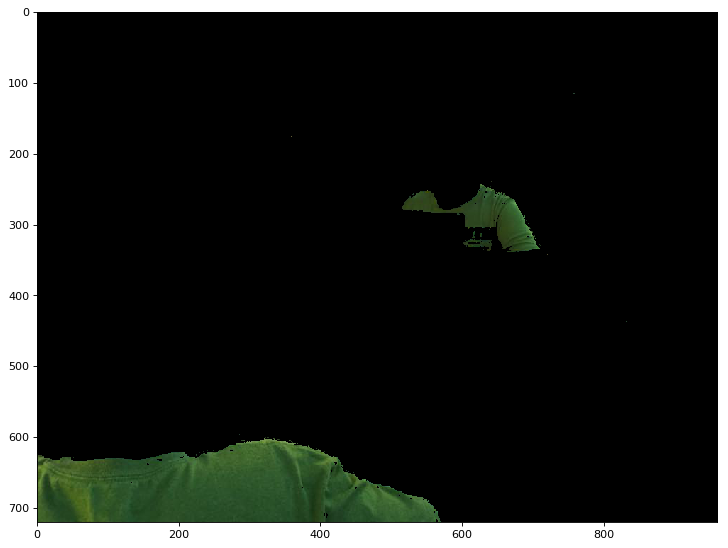

In [6]:
# OpenCV
import cv2

# thresholding
array2 = cv2.imread(filename)
hsv = cv2.cvtColor(array2, cv2.COLOR_BGR2HSV)  # H from 0-179
# green has a hue of ~~ 60
lower_green = np.array([45, 100, 50])
upper_green = np.array([95, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
res = cv2.bitwise_and(array2, array2, mask=mask)
myshow(res)